In [1]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
data = []
while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.rectangle(res,(100,100),(450,450),(255,0,0),2)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    face = frame[100:450,100:450,:]
    face = cv2.resize(face,(50,50))
    print("No of Frames: "+str(len(data)))
    if len(data)<300:
        data.append(face)
    k = cv2.waitKey(5) & 0xFF
    if k == 27 or len(data)>=200:
        break
cv2.destroyAllWindows()
cap.release()


No of Frames: 0
No of Frames: 1
No of Frames: 2
No of Frames: 3
No of Frames: 4
No of Frames: 5
No of Frames: 6
No of Frames: 7
No of Frames: 8
No of Frames: 9
No of Frames: 10
No of Frames: 11
No of Frames: 12
No of Frames: 13
No of Frames: 14
No of Frames: 15
No of Frames: 16
No of Frames: 17
No of Frames: 18
No of Frames: 19
No of Frames: 20
No of Frames: 21
No of Frames: 22
No of Frames: 23
No of Frames: 24
No of Frames: 25
No of Frames: 26
No of Frames: 27
No of Frames: 28
No of Frames: 29
No of Frames: 30
No of Frames: 31
No of Frames: 32
No of Frames: 33
No of Frames: 34
No of Frames: 35
No of Frames: 36
No of Frames: 37
No of Frames: 38
No of Frames: 39
No of Frames: 40
No of Frames: 41
No of Frames: 42
No of Frames: 43
No of Frames: 44
No of Frames: 45
No of Frames: 46
No of Frames: 47
No of Frames: 48
No of Frames: 49
No of Frames: 50
No of Frames: 51
No of Frames: 52
No of Frames: 53
No of Frames: 54
No of Frames: 55
No of Frames: 56
No of Frames: 57
No of Frames: 58
No of F

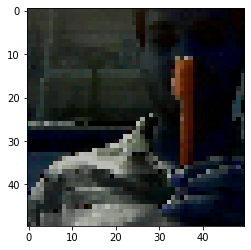

In [2]:
import matplotlib.pyplot as plt
plt.imshow(data[50])

In [3]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
data_not = []
while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.rectangle(res,(100,100),(450,450),(255,0,0),2)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    face = frame[100:450,100:450,:]
    face = cv2.resize(face,(50,50))
    print("No of Frames: "+str(len(data)))
    if len(data_not)<300:
        data_not.append(face)
    k = cv2.waitKey(5) & 0xFF
    if k == 27 or len(data_not)>=200:
        break
cv2.destroyAllWindows()
cap.release()


No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Frames: 200
No of Fram

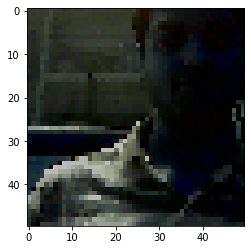

In [4]:
import matplotlib.pyplot as plt
plt.imshow(data_not[50])

In [5]:
import numpy as np
np.save("pen.npy",data)
np.save("pen_not.npy",data_not)

In [6]:
pen = np.load("pen.npy")
pennot = np.load("pen_not.npy")
pen = pen.reshape(200,50*50*3)
pennot = pennot.reshape(200,50*50*3)
X = np.r_[pennot,pen]
labels = np.zeros(X.shape[0])
labels[200:] = 1.0
predict = {0:"No Pen",1:"Pen"}


In [7]:
pen.shape

(200, 7500)

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [9]:
x_train ,x_test, y_train,y_test = train_test_split(X,labels, test_size=0.25)
pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)

In [10]:
svm = SVC()
svm.fit(x_train,y_train)

C:\Users\nice\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
x_test = pca.fit_transform(x_test)
y_pred = svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.42

In [12]:
import cv2
capture = cv2.VideoCapture(0)
while True:
    flag,img = capture.read()
    if flag:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([110,50,50])
        upper_blue = np.array([130,255,255])
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        res = cv2.bitwise_and(frame,frame, mask= mask)
        cv2.rectangle(res,(100,100),(450,450),(255,0,0),2)
        cv2.imshow('frame',frame)
        cv2.imshow('res',res)
        face = frame[100:450,100:450,:]
        face = cv2.resize(face,(50,50))
        face = face.reshape(1,-1)
        face = pca.transform(face)
        p = svm.predict(face)
        n = predict[int(p)]
        print(n)
        cv2.imshow("result",img)
        if cv2.waitKey(2)==27:
            break
capture.release()

No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen
No Pen